In [ ]:
# TensorFlow regression model example ...

import tensorflow as tf
import numpy as np
from tensorflow import keras

x = np.array([-1.0, 0.0, 1.0, 2.0,  3.0,  4.0], dtype=float)
y = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(x, y, epochs=400)

# Save the Keras model to .h5 file ...
model.save("my_model.h5")

Epoch 1/400
1/1 [==============================] - 1s 664ms/step - loss: 71.6912
Epoch 2/400
1/1 [==============================] - 0s 5ms/step - loss: 56.4042
Epoch 3/400
1/1 [==============================] - 0s 4ms/step - loss: 44.3770
Epoch 4/400
1/1 [==============================] - 0s 4ms/step - loss: 34.9146
Epoch 5/400
1/1 [==============================] - 0s 4ms/step - loss: 27.4700
Epoch 6/400
1/1 [==============================] - 0s 3ms/step - loss: 21.6130
Epoch 7/400
1/1 [==============================] - 0s 5ms/step - loss: 17.0049
Epoch 8/400
1/1 [==============================] - 0s 4ms/step - loss: 13.3795
Epoch 9/400
1/1 [==============================] - 0s 4ms/step - loss: 10.5272
Epoch 10/400
1/1 [==============================] - 0s 5ms/step - loss: 8.2831
Epoch 11/400
1/1 [==============================] - 0s 5ms/step - loss: 6.5175
Epoch 12/400
1/1 [==============================] - 0s 3ms/step - loss: 5.1284
Epoch 13/400
1/1 [==============================] 

768

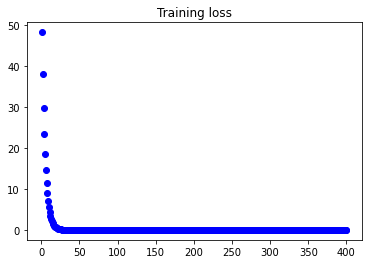

In [ ]:
# ... Show the training loss as diagram

import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.show()

In [ ]:
# ... Show more model details

import tensorflow as tf
import numpy as np
from tensorflow import keras

model = keras.models.load_model("my_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ... Load model file and predict something

import tensorflow as tf
import numpy as np
from tensorflow import keras

model = keras.models.load_model("my_model.h5")
print(np.round(model.predict([3]), 1))

[[10.]]


In [ ]:
# TensorFlow Lite: Load model file and convert model to *.tflite ...

import tensorflow as tf
import numpy as np
from tensorflow import keras

model = keras.models.load_model("my_model.h5")

# Convert the Keras model to .tflite file ...
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open('my_model.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp64wl55dp/assets


INFO:tensorflow:Assets written to: /tmp/tmp64wl55dp/assets


768

In [ ]:
# ... More data to learn (y = mx + b)

#x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0,  5.0,  6.0], dtype=float)
#y = np.array([-0.5, 1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5], dtype=float)

x = np.array([-1.0, 0.0,  1.0, 2.0,  3.0, 4.0,  5.0, 6.0], dtype=float)
y = np.array([0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5], dtype=float)

In [ ]:
# TensorFlow Lite: load *.tflite model file and predict something ...

import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="my_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Use model with input data.
input_shape = input_details[0]['shape']
input_data = np.array([[3.0]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(np.round(output_data, 1))

[[10.]]
